
=== 12.5 Zagat’s Restaurant Ratings ===


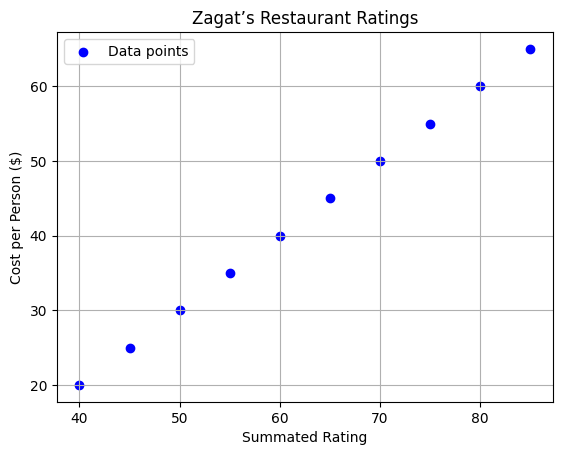

b. Regression Coefficients: beta_0 = -20.00, beta_1 = 1.00
c. Interpretation:
   - beta_0 = -20.00: When the summated rating is 0, the cost per person is $-20.00 (theoretical).
   - beta_1 = 1.00: For each 1-point increase in rating, the cost increases by $1.00.
d. Predicted mean cost for a rating of 50: $30.00
e. Insights for the owner:
   - There is a positive linear relationship between rating and cost.
   - Improving ratings (food, décor, service) can justify higher prices.

=== 12.6 Moving Company Labor Hours ===


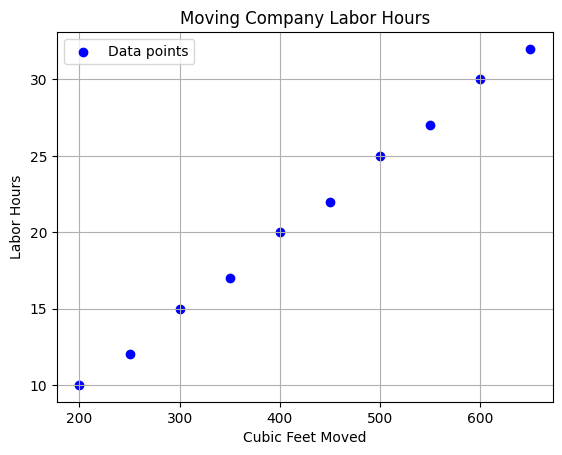

b. Regression Coefficients: beta_0 = -0.12, beta_1 = 0.0497
c. Interpretation of beta_1:
   - beta_1 = 0.0497: For each additional cubic foot, labor hours increase by 0.0497 hours.
d. Predicted mean labor hours for 500 cubic feet: 24.73 hours
e. Insights for the owner:
   - There is a positive linear relationship between cubic feet and labor hours.
   - Plan more resources for larger moves based on the rate of increase.

=== 12.7 Starbucks Bag-Sealing Experiment ===


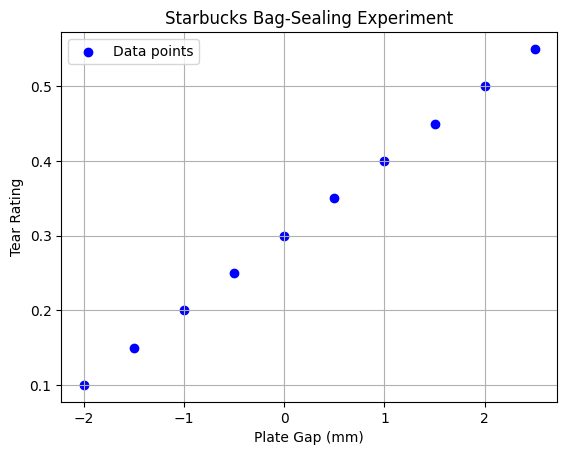

b. Regression Coefficients: beta_0 = 0.30, beta_1 = 0.10
c. Interpretation of beta_1:
   - beta_1 = 0.10: For each 1 mm increase in plate gap, tear rating increases by 0.10 units.
d. Predicted mean tear rating for plate gap 0: 0.30
e. Insights for Starbucks management:
   - There is a positive linear relationship between plate gap and tear rating.
   - Minimize plate gap to reduce tearing and improve bag quality.

=== 12.8 Sports Franchise Value ===


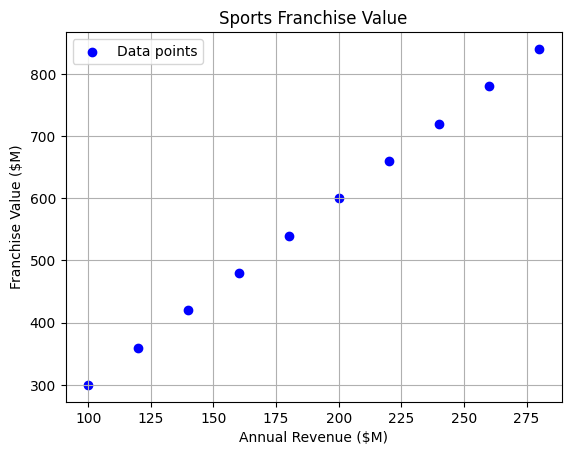

b. Regression Coefficients: beta_0 = 0.00, beta_1 = 3.00
c. Interpretation:
   - beta_0 = 0.00: When revenue is $0M, the franchise value is $0.00M (theoretical).
   - beta_1 = 3.00: For each $1M increase in revenue, the value increases by $3.00M.
d. Predicted mean franchise value for $250M revenue: $750.00M
e. Insights for the group:
   - There is a strong positive linear relationship between revenue and franchise value.
   - Increasing revenue significantly boosts the team’s value.

=== 12.9 Real Estate Agent Rental Cost ===


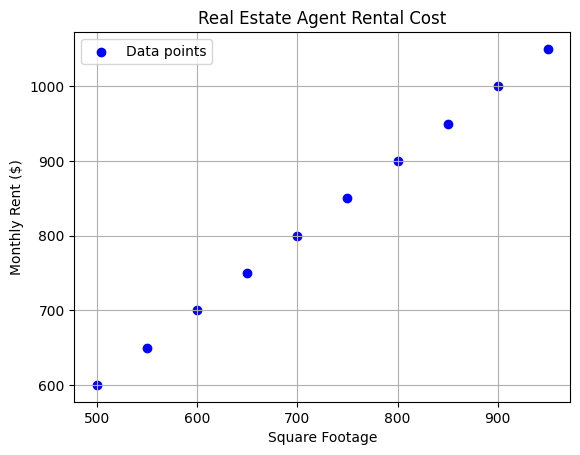

b. Regression Coefficients: beta_0 = 100.00, beta_1 = 1.00
c. Interpretation:
   - beta_0 = 100.00: When square footage is 0, the rent is $100.00 (theoretical).
   - beta_1 = 1.00: For each 1 sq ft increase, the rent increases by $1.00.
d. Predicted mean rent for 800 sq ft: $900.00
e. Why not predict for 1500 sq ft:
   - The data range is 500-950 sq ft. 1500 sq ft is outside this range, and extrapolation may lead to inaccurate predictions.
f. Apartment comparison:
   - 800 sq ft: Predicted rent = $900.00, Actual rent = $1130
   - 830 sq ft: Predicted rent = $930.00, Actual rent = $1410
   - Difference for 800 sq ft: $230.00, Difference for 830 sq ft: $480.00
   - The 800 sq ft apartment is a better deal (less overpriced compared to predicted).

=== 12.10 DVD Sales Revenue ===


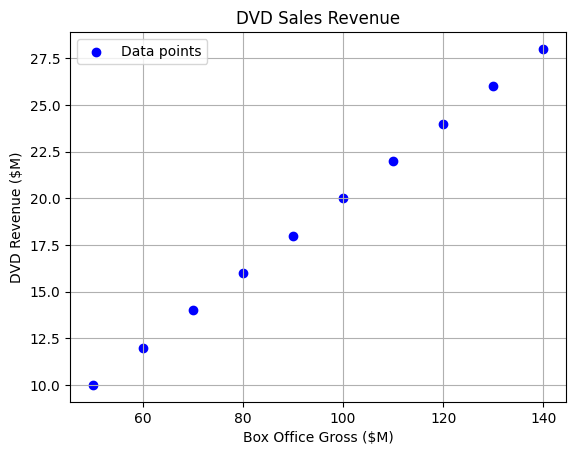

b. Regression Coefficients: beta_0 = 0.00, beta_1 = 0.20
c. Interpretation of beta_1:
   - beta_1 = 0.20: For each $1M increase in box office gross, DVD revenue increases by $0.20M.
d. Predicted mean DVD revenue for $100M gross: $20.00M
e. Conclusions:
   - There is a positive linear relationship between box office gross and DVD revenue.
   - Higher gross leads to higher DVD sales, but other factors (e.g., genre, marketing) may also influence revenue.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Functional approach: Define reusable functions for regression tasks

def calculate_regression_coefficients(x: np.ndarray, y: np.ndarray) -> tuple[float, float]:
    """
    Calculate the regression coefficients (beta_0, beta_1) using the least-squares method.
    
    Args:
        x (np.ndarray): Independent variable (input).
        y (np.ndarray): Dependent variable (output).
    
    Returns:
        tuple[float, float]: (beta_0, beta_1) coefficients.
    """
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")
    
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate beta_1 (slope)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    beta_1 = numerator / denominator
    
    # Calculate beta_0 (intercept)
    beta_0 = y_mean - beta_1 * x_mean
    
    return beta_0, beta_1

def predict_value(beta_0: float, beta_1: float, x_value: float) -> float:
    """
    Predict the y-value for a given x-value using the regression equation.
    
    Args:
        beta_0 (float): Intercept.
        beta_1 (float): Slope.
        x_value (float): Input x-value.
    
    Returns:
        float: Predicted y-value.
    """
    return beta_0 + beta_1 * x_value

def plot_scatter(x: np.ndarray, y: np.ndarray, xlabel: str, ylabel: str, title: str) -> None:
    """
    Plot a scatter plot of the data.
    
    Args:
        x (np.ndarray): Independent variable.
        y (np.ndarray): Dependent variable.
        xlabel (str): Label for x-axis.
        ylabel (str): Label for y-axis.
        title (str): Title of the plot.
    """
    plt.scatter(x, y, color='blue', label='Data points')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# 12.5 Zagat’s Restaurant Ratings
def solve_12_5():
    print("\n=== 12.5 Zagat’s Restaurant Ratings ===")
    # Dummy data
    x = np.array([40, 45, 50, 55, 60, 65, 70, 75, 80, 85])  # Summated rating
    y = np.array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65])  # Cost per person ($)

    # a. Construct a scatter plot
    plot_scatter(x, y, "Summated Rating", "Cost per Person ($)", "Zagat’s Restaurant Ratings")

    # b. Calculate regression coefficients
    beta_0, beta_1 = calculate_regression_coefficients(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.2f}")

    # c. Interpret the meaning of beta_0 and beta_1
    print("c. Interpretation:")
    print(f"   - beta_0 = {beta_0:.2f}: When the summated rating is 0, the cost per person is ${beta_0:.2f} (theoretical).")
    print(f"   - beta_1 = {beta_1:.2f}: For each 1-point increase in rating, the cost increases by ${beta_1:.2f}.")

    # d. Predict the mean cost for a rating of 50
    predicted_cost = predict_value(beta_0, beta_1, 50)
    print(f"d. Predicted mean cost for a rating of 50: ${predicted_cost:.2f}")

    # e. Insights for the owner
    print("e. Insights for the owner:")
    print("   - There is a positive linear relationship between rating and cost.")
    print("   - Improving ratings (food, décor, service) can justify higher prices.")

# 12.6 Moving Company Labor Hours
def solve_12_6():
    print("\n=== 12.6 Moving Company Labor Hours ===")
    # Dummy data
    x = np.array([200, 250, 300, 350, 400, 450, 500, 550, 600, 650])  # Cubic feet
    y = np.array([10, 12, 15, 17, 20, 22, 25, 27, 30, 32])  # Labor hours

    # a. Construct a scatter plot
    plot_scatter(x, y, "Cubic Feet Moved", "Labor Hours", "Moving Company Labor Hours")

    # b. Calculate regression coefficients
    beta_0, beta_1 = calculate_regression_coefficients(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.4f}")

    # c. Interpret the meaning of beta_1
    print("c. Interpretation of beta_1:")
    print(f"   - beta_1 = {beta_1:.4f}: For each additional cubic foot, labor hours increase by {beta_1:.4f} hours.")

    # d. Predict the mean labor hours for 500 cubic feet
    predicted_hours = predict_value(beta_0, beta_1, 500)
    print(f"d. Predicted mean labor hours for 500 cubic feet: {predicted_hours:.2f} hours")

    # e. Insights for the owner
    print("e. Insights for the owner:")
    print("   - There is a positive linear relationship between cubic feet and labor hours.")
    print("   - Plan more resources for larger moves based on the rate of increase.")

# 12.7 Starbucks Bag-Sealing Experiment
def solve_12_7():
    print("\n=== 12.7 Starbucks Bag-Sealing Experiment ===")
    # Dummy data
    x = np.array([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])  # Plate gap (mm)
    y = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55])  # Tear rating

    # a. Construct a scatter plot
    plot_scatter(x, y, "Plate Gap (mm)", "Tear Rating", "Starbucks Bag-Sealing Experiment")

    # b. Calculate regression coefficients
    beta_0, beta_1 = calculate_regression_coefficients(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.2f}")

    # c. Interpret the meaning of beta_1
    print("c. Interpretation of beta_1:")
    print(f"   - beta_1 = {beta_1:.2f}: For each 1 mm increase in plate gap, tear rating increases by {beta_1:.2f} units.")

    # d. Predict the mean tear rating for plate gap = 0
    predicted_tear = predict_value(beta_0, beta_1, 0)
    print(f"d. Predicted mean tear rating for plate gap 0: {predicted_tear:.2f}")

    # e. Insights for management
    print("e. Insights for Starbucks management:")
    print("   - There is a positive linear relationship between plate gap and tear rating.")
    print("   - Minimize plate gap to reduce tearing and improve bag quality.")

# 12.8 Sports Franchise Value
def solve_12_8():
    print("\n=== 12.8 Sports Franchise Value ===")
    # Dummy data
    x = np.array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280])  # Revenue ($M)
    y = np.array([300, 360, 420, 480, 540, 600, 660, 720, 780, 840])  # Value ($M)

    # a. Construct a scatter plot
    plot_scatter(x, y, "Annual Revenue ($M)", "Franchise Value ($M)", "Sports Franchise Value")

    # b. Calculate regression coefficients
    beta_0, beta_1 = calculate_regression_coefficients(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.2f}")

    # c. Interpret the meaning of beta_0 and beta_1
    print("c. Interpretation:")
    print(f"   - beta_0 = {beta_0:.2f}: When revenue is $0M, the franchise value is ${beta_0:.2f}M (theoretical).")
    print(f"   - beta_1 = {beta_1:.2f}: For each $1M increase in revenue, the value increases by ${beta_1:.2f}M.")

    # d. Predict the mean value for $250M revenue
    predicted_value = predict_value(beta_0, beta_1, 250)
    print(f"d. Predicted mean franchise value for $250M revenue: ${predicted_value:.2f}M")

    # e. Insights for the group
    print("e. Insights for the group:")
    print("   - There is a strong positive linear relationship between revenue and franchise value.")
    print("   - Increasing revenue significantly boosts the team’s value.")

# 12.9 Real Estate Agent Rental Cost
def solve_12_9():
    print("\n=== 12.9 Real Estate Agent Rental Cost ===")
    # Dummy data
    x = np.array([500, 550, 600, 650, 700, 750, 800, 850, 900, 950])  # Square footage
    y = np.array([600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050])  # Rent ($)

    # a. Construct a scatter plot
    plot_scatter(x, y, "Square Footage", "Monthly Rent ($)", "Real Estate Agent Rental Cost")

    # b. Calculate regression coefficients
    beta_0, beta_1 = calculate_regression_coefficients(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.2f}")

    # c. Interpret the meaning of beta_0 and beta_1
    print("c. Interpretation:")
    print(f"   - beta_0 = {beta_0:.2f}: When square footage is 0, the rent is ${beta_0:.2f} (theoretical).")
    print(f"   - beta_1 = {beta_1:.2f}: For each 1 sq ft increase, the rent increases by ${beta_1:.2f}.")

    # d. Predict the mean rent for 800 sq ft
    predicted_rent = predict_value(beta_0, beta_1, 800)
    print(f"d. Predicted mean rent for 800 sq ft: ${predicted_rent:.2f}")

    # e. Why not predict for 1500 sq ft?
    print("e. Why not predict for 1500 sq ft:")
    print("   - The data range is 500-950 sq ft. 1500 sq ft is outside this range, and extrapolation may lead to inaccurate predictions.")

    # f. Which apartment is a better deal?
    rent_800_actual = 1130
    rent_830_actual = 1410
    predicted_rent_800 = predict_value(beta_0, beta_1, 800)
    predicted_rent_830 = predict_value(beta_0, beta_1, 830)
    print("f. Apartment comparison:")
    print(f"   - 800 sq ft: Predicted rent = ${predicted_rent_800:.2f}, Actual rent = ${rent_800_actual}")
    print(f"   - 830 sq ft: Predicted rent = ${predicted_rent_830:.2f}, Actual rent = ${rent_830_actual}")
    diff_800 = rent_800_actual - predicted_rent_800
    diff_830 = rent_830_actual - predicted_rent_830
    print(f"   - Difference for 800 sq ft: ${diff_800:.2f}, Difference for 830 sq ft: ${diff_830:.2f}")
    print("   - The 800 sq ft apartment is a better deal (less overpriced compared to predicted).")

# 12.10 DVD Sales Revenue
def solve_12_10():
    print("\n=== 12.10 DVD Sales Revenue ===")
    # Dummy data
    x = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140])  # Box office gross ($M)
    y = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])  # DVD revenue ($M)

    # a. Construct a scatter plot
    plot_scatter(x, y, "Box Office Gross ($M)", "DVD Revenue ($M)", "DVD Sales Revenue")

    # b. Calculate regression coefficients
    beta_0, beta_1 = calculate_regression_coefficients(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.2f}")

    # c. Interpret the meaning of beta_1
    print("c. Interpretation of beta_1:")
    print(f"   - beta_1 = {beta_1:.2f}: For each $1M increase in box office gross, DVD revenue increases by ${beta_1:.2f}M.")

    # d. Predict the mean DVD revenue for $100M gross
    predicted_revenue = predict_value(beta_0, beta_1, 100)
    print(f"d. Predicted mean DVD revenue for $100M gross: ${predicted_revenue:.2f}M")

    # e. Conclusions
    print("e. Conclusions:")
    print("   - There is a positive linear relationship between box office gross and DVD revenue.")
    print("   - Higher gross leads to higher DVD sales, but other factors (e.g., genre, marketing) may also influence revenue.")

# Main function to run all solutions
def main():
    solve_12_5()
    solve_12_6()
    solve_12_7()
    solve_12_8()
    solve_12_9()
    solve_12_10()

if __name__ == "__main__":
    main()


=== 12.5 Zagat’s Restaurant Ratings (Using sklearn) ===


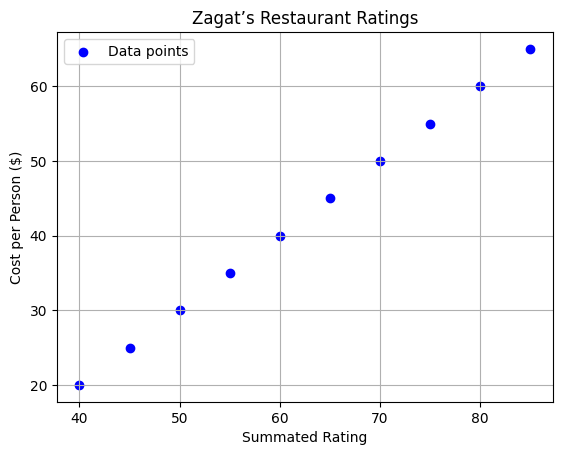

b. Regression Coefficients: beta_0 = -20.00, beta_1 = 1.00
c. Interpretation:
   - beta_0 = -20.00: When the summated rating is 0, the cost per person is $-20.00 (theoretical).
   - beta_1 = 1.00: For each 1-point increase in rating, the cost increases by $1.00.
d. Predicted mean cost for a rating of 50: $30.00
e. Insights for the owner:
   - There is a positive linear relationship between rating and cost.
   - Improving ratings (food, décor, service) can justify higher prices.

=== 12.6 Moving Company Labor Hours (Using sklearn) ===


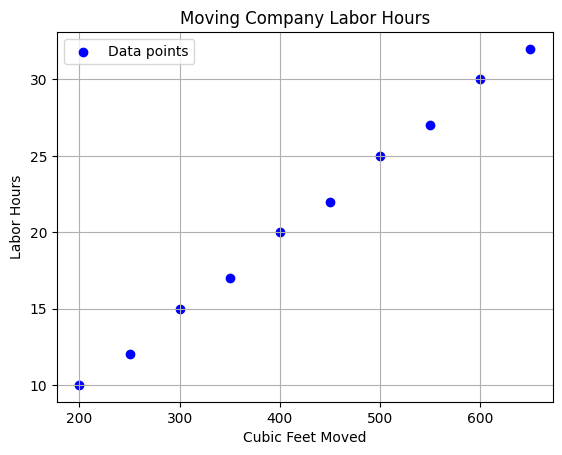

b. Regression Coefficients: beta_0 = -0.12, beta_1 = 0.0497
c. Interpretation of beta_1:
   - beta_1 = 0.0497: For each additional cubic foot, labor hours increase by 0.0497 hours.
d. Predicted mean labor hours for 500 cubic feet: 24.73 hours
e. Insights for the owner:
   - There is a positive linear relationship between cubic feet and labor hours.
   - Plan more resources for larger moves based on the rate of increase.

=== 12.7 Starbucks Bag-Sealing Experiment (Using sklearn) ===


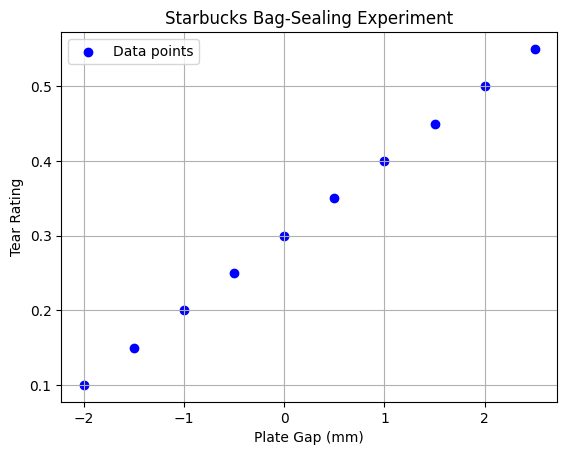

b. Regression Coefficients: beta_0 = 0.30, beta_1 = 0.10
c. Interpretation of beta_1:
   - beta_1 = 0.10: For each 1 mm increase in plate gap, tear rating increases by 0.10 units.
d. Predicted mean tear rating for plate gap 0: 0.30
e. Insights for Starbucks management:
   - There is a positive linear relationship between plate gap and tear rating.
   - Minimize plate gap to reduce tearing and improve bag quality.

=== 12.8 Sports Franchise Value (Using sklearn) ===


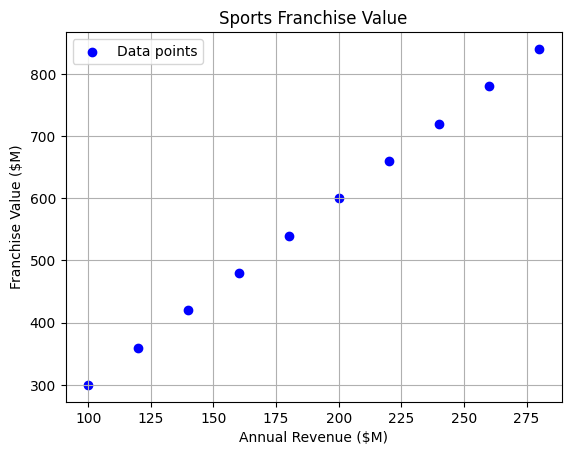

b. Regression Coefficients: beta_0 = -0.00, beta_1 = 3.00
c. Interpretation:
   - beta_0 = -0.00: When revenue is $0M, the franchise value is $-0.00M (theoretical).
   - beta_1 = 3.00: For each $1M increase in revenue, the value increases by $3.00M.
d. Predicted mean franchise value for $250M revenue: $750.00M
e. Insights for the group:
   - There is a strong positive linear relationship between revenue and franchise value.
   - Increasing revenue significantly boosts the team’s value.

=== 12.9 Real Estate Agent Rental Cost (Using sklearn) ===


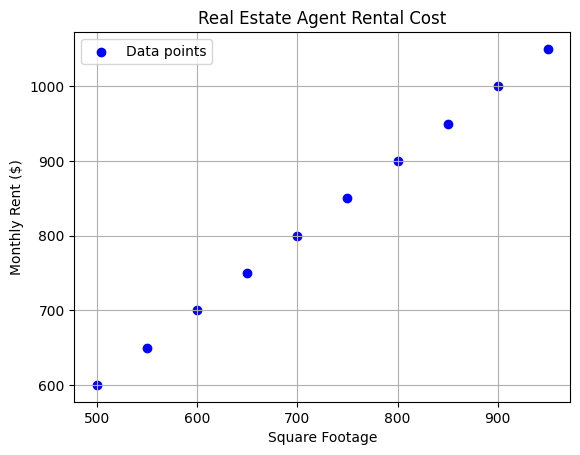

b. Regression Coefficients: beta_0 = 100.00, beta_1 = 1.00
c. Interpretation:
   - beta_0 = 100.00: When square footage is 0, the rent is $100.00 (theoretical).
   - beta_1 = 1.00: For each 1 sq ft increase, the rent increases by $1.00.
d. Predicted mean rent for 800 sq ft: $900.00
e. Why not predict for 1500 sq ft:
   - The data range is 500-950 sq ft. 1500 sq ft is outside this range, and extrapolation may lead to inaccurate predictions.
f. Apartment comparison:
   - 800 sq ft: Predicted rent = $900.00, Actual rent = $1130
   - 830 sq ft: Predicted rent = $930.00, Actual rent = $1410
   - Difference for 800 sq ft: $230.00, Difference for 830 sq ft: $480.00
   - The 800 sq ft apartment is a better deal (less overpriced compared to predicted).

=== 12.10 DVD Sales Revenue (Using sklearn) ===


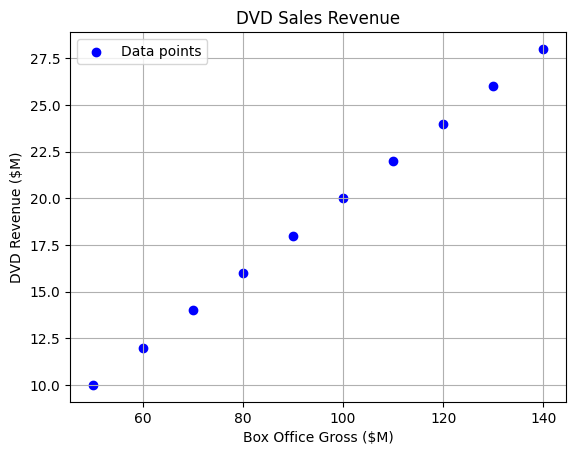

b. Regression Coefficients: beta_0 = -0.00, beta_1 = 0.20
c. Interpretation of beta_1:
   - beta_1 = 0.20: For each $1M increase in box office gross, DVD revenue increases by $0.20M.
d. Predicted mean DVD revenue for $100M gross: $20.00M
e. Conclusions:
   - There is a positive linear relationship between box office gross and DVD revenue.
   - Higher gross leads to higher DVD sales, but other factors (e.g., genre, marketing) may also influence revenue.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Functional approach: Define reusable functions for regression tasks with sklearn

def plot_scatter(x: np.ndarray, y: np.ndarray, xlabel: str, ylabel: str, title: str) -> None:
    """
    Plot a scatter plot of the data.
    
    Args:
        x (np.ndarray): Independent variable.
        y (np.ndarray): Dependent variable.
        xlabel (str): Label for x-axis.
        ylabel (str): Label for y-axis.
        title (str): Title of the plot.
    """
    plt.scatter(x, y, color='blue', label='Data points')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def fit_linear_regression(x: np.ndarray, y: np.ndarray) -> tuple[LinearRegression, float, float]:
    """
    Fit a linear regression model using sklearn and return the model, beta_0, and beta_1.
    
    Args:
        x (np.ndarray): Independent variable (input).
        y (np.ndarray): Dependent variable (output).
    
    Returns:
        tuple: (model, beta_0, beta_1)
    """
    # Reshape x for sklearn (needs to be 2D)
    x_reshaped = x.reshape(-1, 1)
    y_reshaped = y.reshape(-1, 1)
    
    # Fit the model
    model = LinearRegression()
    model.fit(x_reshaped, y_reshaped)
    
    # Extract coefficients
    beta_0 = model.intercept_[0]
    beta_1 = model.coef_[0][0]
    
    return model, beta_0, beta_1

def predict_value(model: LinearRegression, x_value: float) -> float:
    """
    Predict the y-value for a given x-value using the sklearn model.
    
    Args:
        model (LinearRegression): Fitted sklearn model.
        x_value (float): Input x-value.
    
    Returns:
        float: Predicted y-value.
    """
    return model.predict([[x_value]])[0][0]

# 12.5 Zagat’s Restaurant Ratings
def solve_12_5_sklearn():
    print("\n=== 12.5 Zagat’s Restaurant Ratings (Using sklearn) ===")
    # Dummy data
    x = np.array([40, 45, 50, 55, 60, 65, 70, 75, 80, 85])  # Summated rating
    y = np.array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65])  # Cost per person ($)

    # a. Construct a scatter plot
    plot_scatter(x, y, "Summated Rating", "Cost per Person ($)", "Zagat’s Restaurant Ratings")

    # b. Fit linear regression model
    model, beta_0, beta_1 = fit_linear_regression(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.2f}")

    # c. Interpret the meaning of beta_0 and beta_1
    print("c. Interpretation:")
    print(f"   - beta_0 = {beta_0:.2f}: When the summated rating is 0, the cost per person is ${beta_0:.2f} (theoretical).")
    print(f"   - beta_1 = {beta_1:.2f}: For each 1-point increase in rating, the cost increases by ${beta_1:.2f}.")

    # d. Predict the mean cost for a rating of 50
    predicted_cost = predict_value(model, 50)
    print(f"d. Predicted mean cost for a rating of 50: ${predicted_cost:.2f}")

    # e. Insights for the owner
    print("e. Insights for the owner:")
    print("   - There is a positive linear relationship between rating and cost.")
    print("   - Improving ratings (food, décor, service) can justify higher prices.")

# 12.6 Moving Company Labor Hours
def solve_12_6_sklearn():
    print("\n=== 12.6 Moving Company Labor Hours (Using sklearn) ===")
    # Dummy data
    x = np.array([200, 250, 300, 350, 400, 450, 500, 550, 600, 650])  # Cubic feet
    y = np.array([10, 12, 15, 17, 20, 22, 25, 27, 30, 32])  # Labor hours

    # a. Construct a scatter plot
    plot_scatter(x, y, "Cubic Feet Moved", "Labor Hours", "Moving Company Labor Hours")

    # b. Fit linear regression model
    model, beta_0, beta_1 = fit_linear_regression(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.4f}")

    # c. Interpret the meaning of beta_1
    print("c. Interpretation of beta_1:")
    print(f"   - beta_1 = {beta_1:.4f}: For each additional cubic foot, labor hours increase by {beta_1:.4f} hours.")

    # d. Predict the mean labor hours for 500 cubic feet
    predicted_hours = predict_value(model, 500)
    print(f"d. Predicted mean labor hours for 500 cubic feet: {predicted_hours:.2f} hours")

    # e. Insights for the owner
    print("e. Insights for the owner:")
    print("   - There is a positive linear relationship between cubic feet and labor hours.")
    print("   - Plan more resources for larger moves based on the rate of increase.")

# 12.7 Starbucks Bag-Sealing Experiment
def solve_12_7_sklearn():
    print("\n=== 12.7 Starbucks Bag-Sealing Experiment (Using sklearn) ===")
    # Dummy data
    x = np.array([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])  # Plate gap (mm)
    y = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55])  # Tear rating

    # a. Construct a scatter plot
    plot_scatter(x, y, "Plate Gap (mm)", "Tear Rating", "Starbucks Bag-Sealing Experiment")

    # b. Fit linear regression model
    model, beta_0, beta_1 = fit_linear_regression(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.2f}")

    # c. Interpret the meaning of beta_1
    print("c. Interpretation of beta_1:")
    print(f"   - beta_1 = {beta_1:.2f}: For each 1 mm increase in plate gap, tear rating increases by {beta_1:.2f} units.")

    # d. Predict the mean tear rating for plate gap = 0
    predicted_tear = predict_value(model, 0)
    print(f"d. Predicted mean tear rating for plate gap 0: {predicted_tear:.2f}")

    # e. Insights for management
    print("e. Insights for Starbucks management:")
    print("   - There is a positive linear relationship between plate gap and tear rating.")
    print("   - Minimize plate gap to reduce tearing and improve bag quality.")

# 12.8 Sports Franchise Value
def solve_12_8_sklearn():
    print("\n=== 12.8 Sports Franchise Value (Using sklearn) ===")
    # Dummy data
    x = np.array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280])  # Revenue ($M)
    y = np.array([300, 360, 420, 480, 540, 600, 660, 720, 780, 840])  # Value ($M)

    # a. Construct a scatter plot
    plot_scatter(x, y, "Annual Revenue ($M)", "Franchise Value ($M)", "Sports Franchise Value")

    # b. Fit linear regression model
    model, beta_0, beta_1 = fit_linear_regression(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.2f}")

    # c. Interpret the meaning of beta_0 and beta_1
    print("c. Interpretation:")
    print(f"   - beta_0 = {beta_0:.2f}: When revenue is $0M, the franchise value is ${beta_0:.2f}M (theoretical).")
    print(f"   - beta_1 = {beta_1:.2f}: For each $1M increase in revenue, the value increases by ${beta_1:.2f}M.")

    # d. Predict the mean value for $250M revenue
    predicted_value = predict_value(model, 250)
    print(f"d. Predicted mean franchise value for $250M revenue: ${predicted_value:.2f}M")

    # e. Insights for the group
    print("e. Insights for the group:")
    print("   - There is a strong positive linear relationship between revenue and franchise value.")
    print("   - Increasing revenue significantly boosts the team’s value.")

# 12.9 Real Estate Agent Rental Cost
def solve_12_9_sklearn():
    print("\n=== 12.9 Real Estate Agent Rental Cost (Using sklearn) ===")
    # Dummy data
    x = np.array([500, 550, 600, 650, 700, 750, 800, 850, 900, 950])  # Square footage
    y = np.array([600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050])  # Rent ($)

    # a. Construct a scatter plot
    plot_scatter(x, y, "Square Footage", "Monthly Rent ($)", "Real Estate Agent Rental Cost")

    # b. Fit linear regression model
    model, beta_0, beta_1 = fit_linear_regression(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.2f}")

    # c. Interpret the meaning of beta_0 and beta_1
    print("c. Interpretation:")
    print(f"   - beta_0 = {beta_0:.2f}: When square footage is 0, the rent is ${beta_0:.2f} (theoretical).")
    print(f"   - beta_1 = {beta_1:.2f}: For each 1 sq ft increase, the rent increases by ${beta_1:.2f}.")

    # d. Predict the mean rent for 800 sq ft
    predicted_rent = predict_value(model, 800)
    print(f"d. Predicted mean rent for 800 sq ft: ${predicted_rent:.2f}")

    # e. Why not predict for 1500 sq ft?
    print("e. Why not predict for 1500 sq ft:")
    print("   - The data range is 500-950 sq ft. 1500 sq ft is outside this range, and extrapolation may lead to inaccurate predictions.")

    # f. Which apartment is a better deal?
    rent_800_actual = 1130
    rent_830_actual = 1410
    predicted_rent_800 = predict_value(model, 800)
    predicted_rent_830 = predict_value(model, 830)
    print("f. Apartment comparison:")
    print(f"   - 800 sq ft: Predicted rent = ${predicted_rent_800:.2f}, Actual rent = ${rent_800_actual}")
    print(f"   - 830 sq ft: Predicted rent = ${predicted_rent_830:.2f}, Actual rent = ${rent_830_actual}")
    diff_800 = rent_800_actual - predicted_rent_800
    diff_830 = rent_830_actual - predicted_rent_830
    print(f"   - Difference for 800 sq ft: ${diff_800:.2f}, Difference for 830 sq ft: ${diff_830:.2f}")
    print("   - The 800 sq ft apartment is a better deal (less overpriced compared to predicted).")

# 12.10 DVD Sales Revenue
def solve_12_10_sklearn():
    print("\n=== 12.10 DVD Sales Revenue (Using sklearn) ===")
    # Dummy data
    x = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140])  # Box office gross ($M)
    y = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])  # DVD revenue ($M)

    # a. Construct a scatter plot
    plot_scatter(x, y, "Box Office Gross ($M)", "DVD Revenue ($M)", "DVD Sales Revenue")

    # b. Fit linear regression model
    model, beta_0, beta_1 = fit_linear_regression(x, y)
    print(f"b. Regression Coefficients: beta_0 = {beta_0:.2f}, beta_1 = {beta_1:.2f}")

    # c. Interpret the meaning of beta_1
    print("c. Interpretation of beta_1:")
    print(f"   - beta_1 = {beta_1:.2f}: For each $1M increase in box office gross, DVD revenue increases by ${beta_1:.2f}M.")

    # d. Predict the mean DVD revenue for $100M gross
    predicted_revenue = predict_value(model, 100)
    print(f"d. Predicted mean DVD revenue for $100M gross: ${predicted_revenue:.2f}M")

    # e. Conclusions
    print("e. Conclusions:")
    print("   - There is a positive linear relationship between box office gross and DVD revenue.")
    print("   - Higher gross leads to higher DVD sales, but other factors (e.g., genre, marketing) may also influence revenue.")

# Main function to run all solutions
def main():
    solve_12_5_sklearn()
    solve_12_6_sklearn()
    solve_12_7_sklearn()
    solve_12_8_sklearn()
    solve_12_9_sklearn()
    solve_12_10_sklearn()

if __name__ == "__main__":
    main()